# Ransomware Static Analysis

# Preparation

In [1]:
! pip install bottleneck numexpr pandas pefile ete3 pyqt5

^C


In [1]:
import glob
import numpy as np
import os
import pandas as pd
import pefile
# import PyQt5

In [2]:
ransomware_path = "C:/sample/ransomware/"
system32_path = "C:/sample/good/System32/"

In [3]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 100)
# pd.set_option('display.width', 1000)
# pd.set_option('max_colwidth', 400)

In [4]:
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.width")
pd.reset_option("display.max_colwidth")

# Define Functions

In [4]:
# Define function to create dataframes

import logging

# DateTime:Level:Arquivo:Mensagem
log_format = '%(asctime)s:%(levelname)s:%(filename)s:%(message)s'

logging.basicConfig(filename='CreateDataFrame.log',
                    # w -> sobrescreve o arquivo a cada log
                    # a -> não sobrescreve o arquivo
                    filemode='w',
                    level=logging.DEBUG,
                    format=log_format)

logger = logging.getLogger('root')

def CreateDataFrame(path, attribute, index=0, count=0):
    df = pd.DataFrame()
    filesPath = glob.glob(path + "*")
    nameFiles = os.listdir(path)
    for filePath in filesPath:
        # print(file)
        pe = pefile.PE(filePath)
        if attribute == "FILE_HEADER":
            df.loc[index,'Name'] = nameFiles[index]
            for k, v in pe.dump_dict()['FILE_HEADER'].items():
                if isinstance(v,dict):
                    # print("{}: {}".format(k, v["Value"]))
                    df.loc[index, k] = v["Value"]
            # index = 0
            for k, v in pe.dump_dict()['OPTIONAL_HEADER'].items():
                if isinstance(v,dict):
                    # print("{}\n{}: {}".format(filePath, k, v["Value"]))
                    df.loc[index, k] = v["Value"]
            index += 1
        elif attribute == "DIRECTORY_ENTRY_IMPORT":
            try:
                for entry in pe.DIRECTORY_ENTRY_IMPORT:
                    for function in entry.imports:
                        if function.name != None:
                            # print("File:", filePath, "Dll", entry.dll, "API name:", api_call.name)
                            df.loc[count, 'Name'] = nameFiles[index]
                            df.loc[count, 'Dll'] = entry.dll
                            df.loc[count, 'Function'] = function.name
                            logger.info(f'{filePath} {nameFiles[index]} {entry.dll} {function.name} index={index} count={count}')
                            count += 1
            except AttributeError:
                logger.error(f'AttributeError in {filePath}')
            index += 1
    return df

# Manipulating ransomware dataframe

In [12]:
# Create ransomware dataframe
ransomware_df = CreateDataFrame(ransomware_path, "FILE_HEADER")
# ransomware_df.to_csv("./ransomware_df.csv", index=False)    # Uncomment to save the file.

In [7]:
# Read ransomware CSV file
ransomware_df = pd.read_csv("./ransomware_df.csv")

In [8]:
print(ransomware_df.shape)
ransomware_df.head()

(50, 38)


,Name,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,Reserved1,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes
0,131.sample,332.0,5.0,0x571C6108 [Sun Apr 24 06:00:40 2016 UTC],0.0,0.0,224.0,258.0,267.0,11.0,0.0,122880.0,2299392.0,0.0,33303.0,4096.0,126976.0,4194304.0,4096.0,512.0,5.0,1.0,0.0,0.0,5.0,1.0,0.0,2433024.0,1024.0,0.0,3.0,33088.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0
1,Avaddon.sample,332.0,5.0,0x5D652AF9 [Tue Aug 27 13:07:05 2019 UTC],0.0,0.0,224.0,259.0,267.0,12.0,0.0,69632.0,49323520.0,0.0,22283.0,4096.0,73728.0,4194304.0,4096.0,512.0,5.0,1.0,0.0,0.0,5.0,1.0,0.0,49397760.0,1024.0,756569.0,2.0,32768.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0
2,Black_Mamba.sample,332.0,3.0,0x5F54102B [Sat Sep 5 22:24:43 2020 UTC],0.0,0.0,224.0,34.0,267.0,80.0,0.0,11264.0,207360.0,0.0,19398.0,8192.0,24576.0,4194304.0,8192.0,512.0,4.0,0.0,0.0,0.0,6.0,0.0,0.0,245760.0,512.0,0.0,2.0,34144.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0
3,Buhtrap.sample,332.0,9.0,0x5F1199B1 [Fri Jul 17 12:29:37 2020 UTC],0.0,0.0,224.0,33166.0,267.0,2.0,25.0,192512.0,23552.0,0.0,198356.0,4096.0,200704.0,4194304.0,4096.0,512.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,1310720.0,1024.0,0.0,2.0,320.0,1048576.0,16384.0,1048576.0,4096.0,0.0,16.0
4,Buran.sample,332.0,2.0,0x5D6E97C2 [Tue Sep 3 16:41:38 2019 UTC],0.0,0.0,224.0,271.0,267.0,3.0,2.0,320000.0,7168.0,0.0,31218.0,4096.0,327680.0,4194304.0,4096.0,512.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,335872.0,1024.0,0.0,2.0,0.0,1048576.0,16384.0,1048576.0,4096.0,0.0,16.0


In [27]:
# Create ransomware functions dataframe
ransomware_functions = CreateDataFrame(ransomware_path, "DIRECTORY_ENTRY_IMPORT")
# ransomware_functions.to_csv("./ransomware_functions.csv", index=False)    # Uncomment to save the file

In [5]:
# Read ransomware fuctions CSV file
ransomware_functions = pd.read_csv("./ransomware_functions.csv")

In [6]:
ransomware_functions

,Name,Dll,Function
0,131.sample,b'SHLWAPI.dll',b'PathFileExistsW'
1,131.sample,b'SHLWAPI.dll',b'PathFileExistsA'
2,131.sample,b'KERNEL32.dll',b'Sleep'
3,131.sample,b'KERNEL32.dll',b'SizeofResource'
4,131.sample,b'KERNEL32.dll',b'GetConsoleWindow'
...,...,...,...
4314,Win32.Wannacry.sample,b'MSVCRT.dll',b'free'
4315,Win32.Wannacry.sample,b'MSVCRT.dll',b'_initterm'
4316,Win32.Wannacry.sample,b'MSVCRT.dll',b'malloc'
4317,Win32.Wannacry.sample,b'MSVCRT.dll',b'_adjust_fdiv'


In [11]:
# Create System32 dataframe
system32_df = CreateDataFrame(system32_path, "FILE_HEADER")
# system32_df.to_csv("./system32_df.csv", index=False)  # Uncomment to save the file

In [7]:
# Read System32 CSV file
system32_df = pd.read_csv("./system32_df.csv")

In [8]:
system32_df.head()

,Name,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,Reserved1,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,BaseOfData
0,aadcloudap.dll,34404.0,7.0,0x5CCD15A1 [Sat May 4 04:31:29 2019 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,0.0,273920.0,153600.0,0.0,19472.0,4096.0,6.442451e+09,4096.0,512.0,10.0,0.0,10.0,0.0,10.0,0.0,0.0,446464.0,1024.0,439425.0,3.0,16864.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN
1,aadtb.dll,34404.0,7.0,0x60BAFDF1 [Sat Jun 5 04:30:41 2021 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,0.0,620032.0,505344.0,0.0,527744.0,4096.0,6.442451e+09,4096.0,512.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,1142784.0,1024.0,1139912.0,2.0,16736.0,1048576.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN
2,AboveLockAppHost.dll,34404.0,7.0,0x5FF78DB7 [Thu Jan 7 22:39:51 2021 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,0.0,180224.0,107520.0,0.0,33072.0,4096.0,6.442451e+09,4096.0,512.0,10.0,0.0,10.0,0.0,10.0,0.0,0.0,307200.0,1024.0,334257.0,2.0,16736.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN
3,accessibilitycpl.dll,34404.0,7.0,0x57899883 [Sat Jul 16 02:14:27 2016 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,0.0,145920.0,3691520.0,0.0,5680.0,4096.0,6.442451e+09,4096.0,512.0,10.0,0.0,10.0,0.0,10.0,0.0,0.0,3854336.0,1024.0,3825415.0,2.0,16736.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN
4,accountaccessor.dll,34404.0,7.0,0x5FF78E70 [Thu Jan 7 22:42:56 2021 UTC],0.0,0.0,240.0,8226.0,523.0,14.0,0.0,226304.0,97792.0,0.0,223920.0,4096.0,6.442451e+09,4096.0,512.0,10.0,0.0,10.0,0.0,10.0,0.0,0.0,339968.0,1024.0,382452.0,3.0,16736.0,262144.0,4096.0,1048576.0,4096.0,0.0,16.0,NaN


In [29]:
# Create system32 functions dataframe
system32_functions = CreateDataFrame(system32_path, "DIRECTORY_ENTRY_IMPORT")
# system32_functions.to_csv("./system32_functions.csv", index=False)   # Uncomment to save the file

In [9]:
# Read System32 functions CSV file
system32_functions = pd.read_csv("./system32_functions.csv")

In [10]:
system32_functions

,Name,Dll,Function
0,aadcloudap.dll,b'msvcrt.dll',b'_onexit'
1,aadcloudap.dll,b'msvcrt.dll',b'__dllonexit'
2,aadcloudap.dll,b'msvcrt.dll',b'_unlock'
3,aadcloudap.dll,b'msvcrt.dll',b'??1type_info@@UEAA@XZ'
4,aadcloudap.dll,b'msvcrt.dll',b'_errno'
...,...,...,...
460142,ztrace_maps.dll,b'api-ms-win-core-sysinfo-l1-2-1.dll',b'GetSystemTimeAsFileTime'
460143,ztrace_maps.dll,b'api-ms-win-core-interlocked-l1-2-0.dll',b'InitializeSListHead'
460144,ztrace_maps.dll,b'api-ms-win-core-rtlsupport-l1-2-0.dll',b'RtlCaptureContext'
460145,ztrace_maps.dll,b'api-ms-win-core-rtlsupport-l1-2-0.dll',b'RtlLookupFunctionEntry'


# Applying DAMICORE

## Create TXT files from ransomwares

In [32]:
def CreateTXTFiles(input_path, ransomware=False):
    output_path = "../damicore/executable-functions/"
    filesPath = glob.glob(input_path + "*")
    nameFiles = os.listdir(input_path)
    index = 0
    count = 0
    for filePath in filesPath:
        df = pd.DataFrame()
        pe = pefile.PE(filePath)
        try:
            for entry in pe.DIRECTORY_ENTRY_IMPORT:
                for function in entry.imports:
                    if function.name != None:
                        # print("File:", filePath, "Dll", entry.dll, "API name:", api_call.name)
                        # df.loc[count, 'Name'] = nameFiles[index]
                        df.loc[count, 'Dll'] = entry.dll
                        df.loc[count, 'Function'] = function.name
                        count += 1
        except AttributeError:
            print("File", filePath, "does not have imports.")
        
        if ransomware:
            output = output_path + "RANS-" + nameFiles[index]
        else:
            output = output_path + "GOOD-" + nameFiles[index]
        
        with open(output, 'w', newline='\r\n') as f:
            f.write( df.to_string(header=False, index=False) )
        index += 1
        count = 0


In [33]:
CreateTXTFiles(ransomware_path, True)
# CreateTXTFiles(system32_path) # Uncomment to save TXT files of goodwares.

File C:/sample/ransomware\Sodinokibi.sample does not have imports.
File C:/sample/ransomware\Thanos.sample does not have imports.


## Manipulating phylogenetic tree

### Manipulating phylogenetic tree with ETE Toolkit

In [18]:
# import ete3
t = ete3.PhyloTree("../damicore/results/texts.newick")

In [19]:
# t.write(outfile="../damicore/results/tree.txt")
t.show()

TypeError: index 0 has type 'float' but 'int' is expected

In [82]:
import ete3
ete3.__file__
%run "C:\\Users\\Nilson\\AppData\\Roaming\\Python\\Python310\\site-packages\\ete3\\__init__.py"


ImportError: attempted relative import with no known parent package

In [1]:
pip install ncbitaxonomy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U https://github.com/etetoolkit/ete/archive/qt5.zip

### Manipulating phylogenetic tree with Dendropy

In [21]:
pip install dendropy

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 15.2/15.2 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for dendropy, since package 'wheel' is not installed.
  Running setup.py install for dendropy: started
  Running setup.py install for dendropy: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [22]:
import dendropy

In [30]:
tree1 = dendropy.Tree.get(path="../damicore/results/texts.newick", schema="newick")
# tree1.print_plot()
# print(tree1)

In [ ]:
tree_data = []
tree = dendropy.Tree.get(path="../damicore/results/texts.newick",schema="newick")
pdc = tree.phylogenetic_distance_matrix()
for i, t1 in enumerate(tree.taxon_namespace[:-1]):
    for t2 in tree.taxon_namespace[i+1:]:
        tip_pair = {}
        tip_dist_list = []
        tip_pair[t1] = t2
        distance = pdc(t1, t2)
        tip_dist_list.append(tip_pair)
        tip_dist_list.append(distance)
        tree_data.append(tip_dist_list)

print(tree_data)

### Manipulating phylogenetic tree with Phylo

In [ ]:
! pip install Bio Matplotlib pydot

In [27]:
from Bio import Phylo

In [ ]:
tree = Phylo.read("../damicore/results/test.newick", "newick")
print(tree)

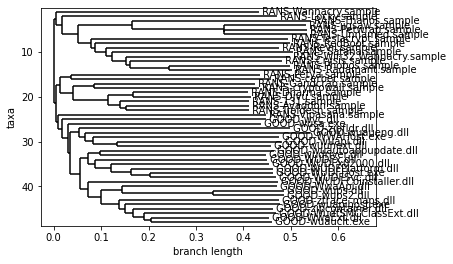

In [29]:
tree.ladderize()  # Flip branches so deeper clades are displayed at top
Phylo.draw(tree)

In [30]:
import pylab
Phylo.draw_graphviz(tree)
pylab.show()

AttributeError: module 'Bio.Phylo' has no attribute 'draw_graphviz'

## Understanding Generated Tree

In [84]:
ransomware_functions = pd.read_csv("./ransomware_functions.csv")
system32_functions = pd.read_csv("./system32_functions.csv")
peFunctions = pd.concat([ransomware_functions, system32_functions], ignore_index=True)

def insertCountFunctions(df):
    df.reset_index(drop=True, inplace=True)
    df['CountFunctions'] = 0
    for i in range(len(df)):
        name = df.loc[i, "Name"]
        df.loc[i, "CountFunctions"] = peFunctions[peFunctions.Name == name].shape[0]


### Branch 1

* GOOD-Microsoft.Uev.SyncController.exe
* GOOD-acu.exe
* GOOD-mtedit.exe
* RANS-Ryuk.sample
* RANS-Lonal.sample
* RANS-Jigsaw.sample
* RANS-Petwrap.sample
* RANS-Unnamed.sample
* RANS-Black_Mamba.sample
* RANS-Ghghdshch130.sample
* RANS-Chaos_Builder.sample
* RANS-Chaos_builder_v4.sample

In [94]:
Br1 = peFunctions[  peFunctions['Name'].str.contains("SyncController.exe") | \
                    peFunctions['Name'].str.contains("acu\.exe") | \
                    peFunctions['Name'].str.contains("mtedit") | \
                    peFunctions['Name'].str.contains("Ryuk\.") | \
                    peFunctions['Name'].str.contains("Lonal") | \
                    peFunctions['Name'].str.contains("Jigsaw") | \
                    peFunctions['Name'].str.contains("Petwrap") | \
                    peFunctions['Name'].str.contains("Unnamed") | \
                    peFunctions['Name'].str.contains("Black_Mamba") | \
                    peFunctions['Name'].str.contains("Ghghdshch130") | \
                    peFunctions['Name'].str.contains("Chaos_Builder") | \
                    peFunctions['Name'].str.contains("Chaos_builder_v4")]
Br1

,Name,Dll,Function
204,Black_Mamba.sample,b'mscoree.dll',b'_CorExeMain'
760,Chaos_Builder.sample,b'mscoree.dll',b'_CorExeMain'
761,Chaos_builder_v4.sample,b'mscoree.dll',b'_CorExeMain'
1481,Ghghdshch130.sample,b'mscoree.dll',b'_CorExeMain'
1482,Jigsaw.sample,b'mscoree.dll',b'_CorExeMain'
2123,Lonal.sample,b'mscoree.dll',b'_CorExeMain'
2439,Petwrap.sample,b'mscoree.dll',b'_CorExeMain'
3015,Ryuk.sample,b'mscoree.dll',b'_CorExeMain'
3462,Unnamed.sample,b'mscoree.dll',b'_CorExeMain'
8298,acu.exe,b'mscoree.dll',b'_CorExeMain'


Near nodes

In [45]:
system32_functions[ system32_functions['Name'].str.contains("WmiAccess")]

,Name,Dll,Function
195813,Microsoft.Uev.Management.WmiAccess.dll,b'mscoree.dll',b'_CorDllMain'


In [95]:
pesCorExeMain = peFunctions[peFunctions['Function'].str.contains('CorExeMain', case=False)]
nearsBr1 = pd.concat([pesCorExeMain, Br1]).drop_duplicates(keep=False)
nearsBr1

,Name,Dll,Function
103434,dsac.exe,b'mscoree.dll',b'_CorExeMain'
171774,LbfoAdmin.exe,b'mscoree.dll',b'_CorExeMain'
313552,ScriptRunner.exe,b'mscoree.dll',b'_CorExeMain'
319694,ServerManager.exe,b'mscoree.dll',b'_CorExeMain'
344732,stordiag.exe,b'mscoree.dll',b'_CorExeMain'
367127,TsWpfWrp.exe,b'mscoree.dll',b'_CorExeMain'
371211,UevAgentPolicyGenerator.exe,b'mscoree.dll',b'_CorExeMain'
371212,UevAppMonitor.exe,b'mscoree.dll',b'_CorExeMain'
371213,UevTemplateBaselineGenerator.exe,b'mscoree.dll',b'_CorExeMain'
371214,UevTemplateConfigItemGenerator.exe,b'mscoree.dll',b'_CorExeMain'


In [98]:
insertCountFunctions(Br1)
insertCountFunctions(nearsBr1)

C:\Users\Nilson\AppData\Local\Temp\ipykernel_17980\3888943809.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CountFunctions'] = 0


In [97]:
Br1

,Name,Dll,Function,CountFunctions
0,Black_Mamba.sample,b'mscoree.dll',b'_CorExeMain',1
1,Chaos_Builder.sample,b'mscoree.dll',b'_CorExeMain',1
2,Chaos_builder_v4.sample,b'mscoree.dll',b'_CorExeMain',1
3,Ghghdshch130.sample,b'mscoree.dll',b'_CorExeMain',1
4,Jigsaw.sample,b'mscoree.dll',b'_CorExeMain',1
5,Lonal.sample,b'mscoree.dll',b'_CorExeMain',1
6,Petwrap.sample,b'mscoree.dll',b'_CorExeMain',1
7,Ryuk.sample,b'mscoree.dll',b'_CorExeMain',1
8,Unnamed.sample,b'mscoree.dll',b'_CorExeMain',1
9,acu.exe,b'mscoree.dll',b'_CorExeMain',1


In [99]:
nearsBr1

,Name,Dll,Function,CountFunctions
0,dsac.exe,b'mscoree.dll',b'_CorExeMain',1
1,LbfoAdmin.exe,b'mscoree.dll',b'_CorExeMain',1
2,ScriptRunner.exe,b'mscoree.dll',b'_CorExeMain',1
3,ServerManager.exe,b'mscoree.dll',b'_CorExeMain',1
4,stordiag.exe,b'mscoree.dll',b'_CorExeMain',1
5,TsWpfWrp.exe,b'mscoree.dll',b'_CorExeMain',1
6,UevAgentPolicyGenerator.exe,b'mscoree.dll',b'_CorExeMain',1
7,UevAppMonitor.exe,b'mscoree.dll',b'_CorExeMain',1
8,UevTemplateBaselineGenerator.exe,b'mscoree.dll',b'_CorExeMain',1
9,UevTemplateConfigItemGenerator.exe,b'mscoree.dll',b'_CorExeMain',1


### Branch 2

* GOOD-BPAInst.dll
* GOOD-MuxInst.dll
* GOOD-miguiresource.dll
* GOOD-mscat32.dll
* GOOD-mssip32.dll
* RANS-Crysis.sample
* RANS-LordEK.sample
* RANS-Phobos.sample
* RANS-Radamant.sample
* RANS-File.sample
* RANS-Win32.Wannacry.sample

### Branch 3

* RANS-System_Lock_1.2b1.sample
* RANS-Djvu.sample
* RANS-Ransomware.tmp2.sample
* RANS-Lockbit.Trojan.sample
* RANS-Mamba_xox_b.sample
* RANS-Dharma.sample
* RANS-Faux-v3.sample
* RANS-Ryuk_copy.sample
* RANS-Troldesh.sample
* RANS-Ryuk2.sample
* RANS-Ransomware.tmp.sample
* RANS-Avaddon.sample
* RANS-131.sample
* GOOD-mscoree.dll
* GOOD-msdadiag.dll
* GOOD-mqmigplugin.dll
* GOOD-mscories.dll
* GOOD-atl100.dll